<a href="https://colab.research.google.com/github/ypanjwani/titanicdata-task1/blob/main/ElevateLab_Titanic_Data_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.isna().sum()/df.shape[0]*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


Cabin column has too many null values -> Drop the column

Age has around 20% missing values -> Fill with random values

Embarked has 2% missing values -> Fill with mean/median

In [5]:
age_null_count = df['Age'].isnull().sum()

# Generate random ages from the existing age distribution
age_mean = df['Age'].mean()
age_std = df['Age'].std()

# Generate random values from normal distribution
random_ages = np.random.normal(loc=age_mean, scale=age_std, size=age_null_count)

# Optional: Round and clip values to stay within realistic bounds (e.g., 0–80)
random_ages = np.clip(random_ages, 0, 80)

# Replace the NaNs in Age with these random values
df.loc[df['Age'].isnull(), 'Age'] = random_ages

In [7]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [8]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [10]:
df.drop(columns='Cabin', inplace=True)

In [11]:
# One-hot encoding for 'Embarked' and 'Sex'
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


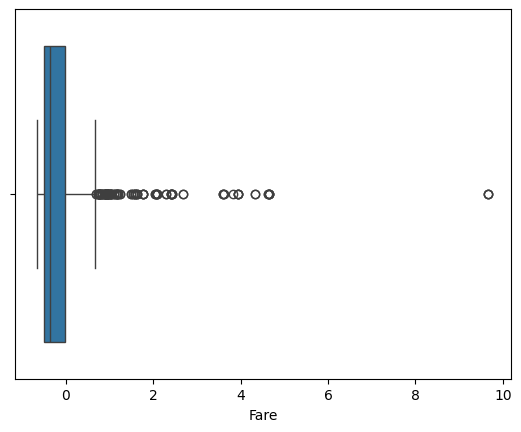

In [13]:
sns.boxplot(x=df['Fare'])
plt.show()

# Remove outliers using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['Fare'] < (Q1 - 1.5 * IQR)) | (df['Fare'] > (Q3 + 1.5 * IQR)))]


# Interview Questions

**1. What are the different types of missing data?**

MCAR: Missing Completely at Random.

MAR: Missing at Random.

MNAR: Missing Not at Random (depends on the missing value itself).

**2. How do you handle categorical variables?**

Use:

Label Encoding (ordinal data)

One-Hot Encoding (nominal data)

**3. What is the difference between normalization and standardization?**

Normalization: Scales data to range [0,1] – good for min-max scaling.

Standardization: Centers data around mean 0, std dev 1 – good for normal distribution.

**4. How do you detect outliers?**

Visual: Boxplots, scatter plots.

Statistical: Z-score, IQR method.

**5. Why is preprocessing important in ML?**

Ensures clean, consistent, and meaningful input data.

Prevents bias, improves model accuracy and performance.

**6. What is one-hot encoding vs label encoding?**

One-hot: Creates binary columns (used for unordered categories).

Label: Assigns numeric codes (used for ordered categories).

**7. How do you handle data imbalance?**

Techniques:

Oversampling (SMOTE)

Undersampling

Class weighting

Synthetic data generation

**8. Can preprocessing affect model accuracy?**

 Absolutely. Poor preprocessing = noisy or misleading data = bad model performance.